## Final Project Submission

* Carly Tsuda
* Full Time January Start
* Review Scheduled 2/9/2021
* Instructor: Victor Geislinger


Start by importing libraries I'll use throughout the project.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


Overview

IMDB Main 

In [3]:
df_imdb_title = pd.read_csv("zippedData/imdb.title.basics.csv.gz")

df_imdb_title.set_index('tconst', inplace=True)
df_imdb_title.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


IMDB Viewer ratings

In [4]:
df_imdb_ratings = pd.read_csv("zippedData/imdb.title.ratings.csv.gz")
df_imdb_ratings.set_index('tconst', inplace=True)
df_imdb_ratings.head()

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


In [5]:
#join the film data and the ratings data

df_imdb_merge = df_imdb_title.join(df_imdb_ratings)
df_imdb_merge.head(20)

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,NaN,NaN
tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32.0
tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263.0
tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History",NaN,NaN


Data cleaning

In [6]:
#check out the merged data
df_imdb_merge.isna().sum()

primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
averagerating      72288
numvotes           72288
dtype: int64

How I want to handle the missing data:
* original title : drop column
* runtime: leave as is for now
* genres: explore and see - drop rows with missing genre
* average rating/numvotes: remove films that are missing, clean unmerged table to use without ratings

In [7]:
#df_imdb_merge = df_imdb_merge.drop('original_title', axis = 1) #drop the original title row
df_imdb_merge.dropna(subset=['genres', 'averagerating', 'numvotes'], inplace=True)
df_imdb_merge.head(20)
#df_imdb_nogenres = df_imdb_merge[df_imdb_merge['genres'].isna()]
#df_imdb_nogenres.info()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32.0
tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263.0
tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451.0
tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64.0


I want to be able to handle genres individually

1. I want to create a column of 'main genre' with only one option
2. I want to create a series of columns with bool values for each possible genre (stretch)

In [8]:
example = df_imdb_merge['genres'].iloc[0].split(',')[0]
print(example)
#create a new column called 'main_genre' with only the first genre listed
#this was a problem because main genre was the first alphabetically
#df_imdb_merge['main_genre'] = df_imdb_merge['genres'].map(lambda genres_list: str(genres_list).split(',')[0])
#df_imdb_merge.head()
#df_imdb_merge['main_genre'].unique()

Action


In [9]:
# genres function from class

def make_genre_columns(dataframe, genre_col_name='genres'):
    '''
    '''
    ##get list of unique genres
    #join all the (unique) genre values into one big string
    list_all_genres = ','.join(dataframe[genre_col_name].unique())
    #get a set of all unique genres wo duplicates
    unique_genres = set(list_all_genres.split(','))
    
    ## create new columns witht he genres and populate with 0/1
    #make safe copy
    new_dataframe = dataframe.copy(deep=True)
    for genre in unique_genres:
        new_dataframe[genre] = new_dataframe[genre_col_name].map(lambda val: 1 if genre in val else 0)
    
    #drop unused genre column    
    new_dataframe = new_dataframe.drop([genre_col_name], axis=1)
    return new_dataframe
#execute and view
df_imdb_genres = make_genre_columns(df_imdb_merge)
df_imdb_genres.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73052 entries, tt0063540 to tt9916160
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    73052 non-null  object 
 1   original_title   73052 non-null  object 
 2   start_year       73052 non-null  int64  
 3   runtime_minutes  65720 non-null  float64
 4   averagerating    73052 non-null  float64
 5   numvotes         73052 non-null  float64
 6   Sport            73052 non-null  int64  
 7   Adventure        73052 non-null  int64  
 8   News             73052 non-null  int64  
 9   Action           73052 non-null  int64  
 10  Reality-TV       73052 non-null  int64  
 11  Thriller         73052 non-null  int64  
 12  Comedy           73052 non-null  int64  
 13  Game-Show        73052 non-null  int64  
 14  History          73052 non-null  int64  
 15  Family           73052 non-null  int64  
 16  Music            73052 non-null  int64  
 17  Fanta

In [10]:
#string normalizing function

def normalize_string(title):
    title_list = title.split(' ', 2)
    title_list = title_list[:2]
    new_title = ""
    for word in title_list:
        temp = ''.join([i for i in word if i.isalnum()])
        new_title = new_title + temp
    #new_title = ''.join(filter(str.isalnum, title_list))    #from stackoverflow
    #new_title = new_title[:8]
    new_title = new_title.lower()
    
    return new_title

#test new function

test_list = ['Harry Potter and the', 'Star Wars Ep. VII: the Force Awakens', 'Star Wars: the Force Awakens', '2012']

for each in test_list:
    print(each + " : ")
    print(normalize_string(each))

Harry Potter and the : 
harrypotter
Star Wars Ep. VII: the Force Awakens : 
starwars
Star Wars: the Force Awakens : 
starwars
2012 : 
2012


In [11]:
def normalize_string_mild(title):

    new_title = ''.join(filter(str.isalnum, title))    #from stackoverflow
    new_title = new_title.lower()
    
    return new_title

#test new function

test_list = ['Harry Potter and the', 'Star Wars Ep. VII: the Force Awakens', 'Star Wars: the Force Awakens', '2012']

for each in test_list:
    print(each + " : ")
    print(normalize_string_mild(each))

Harry Potter and the : 
harrypotterandthe
Star Wars Ep. VII: the Force Awakens : 
starwarsepviitheforceawakens
Star Wars: the Force Awakens : 
starwarstheforceawakens
2012 : 
2012


In [12]:
#preserve original dataset
df_imdb_clean = df_imdb_genres.copy(deep=True)

#Attempt to minimize duplicates by removing shorter films, or films where there is no runtime

df_imdb_clean.dropna(subset=["runtime_minutes"])
df_imdb_clean = df_imdb_clean.loc[(df_imdb_clean['runtime_minutes'] > 80)]
df_imdb_clean 
df_imdb_clean.head(30)

df_imdb_clean.loc[df_imdb_clean['start_year'] > 2008]

df_imdb_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49890 entries, tt0063540 to tt9914286
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    49890 non-null  object 
 1   original_title   49890 non-null  object 
 2   start_year       49890 non-null  int64  
 3   runtime_minutes  49890 non-null  float64
 4   averagerating    49890 non-null  float64
 5   numvotes         49890 non-null  float64
 6   Sport            49890 non-null  int64  
 7   Adventure        49890 non-null  int64  
 8   News             49890 non-null  int64  
 9   Action           49890 non-null  int64  
 10  Reality-TV       49890 non-null  int64  
 11  Thriller         49890 non-null  int64  
 12  Comedy           49890 non-null  int64  
 13  Game-Show        49890 non-null  int64  
 14  History          49890 non-null  int64  
 15  Family           49890 non-null  int64  
 16  Music            49890 non-null  int64  
 17  Fanta

In [13]:
#per Victor's recommendation, I want to normalize the title column to make joining easier
df_imdb_clean['normalized_title'] = df_imdb_clean['primary_title'].map(normalize_string)
df_imdb_clean['normalized_title'] = df_imdb_clean['normalized_title'] + df_imdb_clean['start_year'].astype(str)
#looks like we're having trouble with longer titles, gonna do a test with star wars
# code for searching by str.contains from stackoverflow
df_imdb_clean['ntitle_duplicate'] = df_imdb_clean.duplicated(subset='normalized_title', keep=False)
df_imdb_clean.loc[df_imdb_clean["ntitle_duplicate"] == True].count()

primary_title       5104
original_title      5104
start_year          5104
runtime_minutes     5104
averagerating       5104
numvotes            5104
Sport               5104
Adventure           5104
News                5104
Action              5104
Reality-TV          5104
Thriller            5104
Comedy              5104
Game-Show           5104
History             5104
Family              5104
Music               5104
Fantasy             5104
Western             5104
Animation           5104
Sci-Fi              5104
Short               5104
Drama               5104
Horror              5104
Documentary         5104
Mystery             5104
Crime               5104
Biography           5104
Romance             5104
Adult               5104
War                 5104
Musical             5104
normalized_title    5104
ntitle_duplicate    5104
dtype: int64

In [14]:
#going to try to weed through some of the duplicates to salvage
df_imdb_clean['ntitle_duplicate'] = df_imdb_clean.duplicated(subset='normalized_title', keep=False)
df_imdb_clean = df_imdb_clean.loc[((df_imdb_clean["ntitle_duplicate"] == True) & (df_imdb_clean['numvotes'] > 1000)) | (df_imdb_clean["ntitle_duplicate"] == False)]
df_imdb_clean['ntitle_duplicate'] =  df_imdb_clean.duplicated(subset='normalized_title', keep=False)
df_imdb_clean.loc[df_imdb_clean["ntitle_duplicate"] == True].count()

#remove duplicates

df_imdb_clean = df_imdb_clean.loc[df_imdb_clean["ntitle_duplicate"] == False]

I might want to clean up the IMDB title in the same way so that I can have a dataset with more data but without ratings

For now: df_imdb_clean is my dataframe of IMDB data with ratings

In [15]:
#I used this cell to crawl through the other IMDB data
df_imdb_test = pd.read_csv("zippedData/imdb.title.akas.csv.gz")
print(df_imdb_test.info())
df_imdb_test.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB
None


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
5,tt0369610,15,Jurassic World,GR,NaN,imdbDisplay,NaN,0.0
6,tt0369610,16,Jurassic World,IT,NaN,imdbDisplay,NaN,0.0
7,tt0369610,17,Jurski svijet,HR,NaN,imdbDisplay,NaN,0.0
8,tt0369610,18,Olam ha'Yura,IL,he,imdbDisplay,NaN,0.0
9,tt0369610,19,Jurassic World: Mundo Jurásico,MX,NaN,imdbDisplay,NaN,0.0


Box Office Mojo data

In [16]:
bom_gross = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


TMDB Main movie data

In [17]:
df_tmdb_movies = pd.read_csv("zippedData/tmdb.movies.csv.gz")
df_tmdb_movies.head()

#this one seems less useful than the IMDB data, but I'm interested in the popularity column

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


Rotten Tomatoes main info

In [18]:
df_rt_info = pd.read_csv("zippedData/rt.movie_info.tsv.gz", sep='\t', header=0)
df_rt_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


TN Budget Data

In [19]:
#exploring....
df_tn_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
df_tn_budgets.info()

#I liked this database because it has the most complete budget vs gross data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [20]:
#change the date to a datetime object

df_tn_budgets['release_date'] = pd.to_datetime(df_tn_budgets['release_date'])
print(df_tn_budgets['release_date'].dtype)
df_tn_budgets.head()

datetime64[ns]


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [21]:
#turn the budget and gross columns into ints
# I tried to find a better way to do this but they were all more trouble than they were worth
cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for c in cols:
    df_tn_budgets[c] = df_tn_budgets[c].str.replace('$', "")
    df_tn_budgets[c] = df_tn_budgets[c].str.replace(',', "")
    df_tn_budgets[c] = df_tn_budgets[c].astype('float')     #values were too big for int
df_tn_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [78]:
#create a column of the total gross
df_tn_budgets["intl_gross"] = df_tn_budgets['worldwide_gross'] - df_tn_budgets['domestic_gross']

#create a net profit column
df_tn_budgets["net_profit"] = df_tn_budgets['worldwide_gross'] - df_tn_budgets['production_budget']

#create ROI column
df_tn_budgets['roi'] = df_tn_budgets['net_profit'] / df_tn_budgets['production_budget']

#only need to do this once
#df_tn_budgets.drop("total_gross", axis=1, inplace=True)

df_tn_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi,release_year,intl_gross,net_profit
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,5.532577,2009,2.015838e+09,2.351345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.546673,2011,8.046000e+08,6.350639e+08
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-0.572108,2019,1.070000e+08,-2.002376e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,3.243841,2015,9.440081e+08,1.072414e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,3.153696,2017,6.965404e+08,9.997217e+08


In [79]:
#check what films turn up when we sort by ROI

df_tn_budgets_roi = df_tn_budgets.sort_values(by=['roi'], ascending=False)
df_tn_budgets_roi.head()

#df_tn_budgets_total_gross = df_tn_budgets.sort_values(by=['total_gross'], ascending=False)
#df_tn_budgets_total_gross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi,release_year,intl_gross,net_profit
5745,46,1972-06-30,Deep Throat,25000.0,45000000.0,45000000.0,1799.000000,1972,0.0,44975000.0
5613,14,1980-03-21,Mad Max,200000.0,8750000.0,99750000.0,497.750000,1980,91000000.0,99550000.0
5492,93,2009-09-25,Paranormal Activity,450000.0,107918810.0,194183034.0,430.517853,2009,86264224.0,193733034.0
5679,80,2015-07-10,The Gallows,100000.0,22764410.0,41656474.0,415.564740,2015,18892064.0,41556474.0
5406,7,1999-07-14,The Blair Witch Project,600000.0,140539099.0,248300000.0,412.833333,1999,107760901.0,247700000.0


In [80]:
#pull release year out of the datetime for groupby purposes (found on slackoverflow)
df_tn_budgets['release_year'] = df_tn_budgets['release_date'].map(lambda x: x.strftime('%Y'))
#cast year column as int
df_tn_budgets['release_year'] = df_tn_budgets['release_year'].astype(int)
#df_tn_budgets.info()
grouped_tn_budgets = df_tn_budgets.groupby("release_year")
grouped_tn_budgets.size()

release_year
1915      1
1916      2
1920      1
1925      2
1927      1
       ... 
2016    219
2017    168
2018    143
2019     67
2020      3
Length: 96, dtype: int64

In [81]:
#pull out only films from 2009 and after
current_tn_budgets = df_tn_budgets.loc[df_tn_budgets['release_year'] >= 2009]
current_tn_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2433 entries, 0 to 5780
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2433 non-null   int64         
 1   release_date       2433 non-null   datetime64[ns]
 2   movie              2433 non-null   object        
 3   production_budget  2433 non-null   float64       
 4   domestic_gross     2433 non-null   float64       
 5   worldwide_gross    2433 non-null   float64       
 6   roi                2433 non-null   float64       
 7   release_year       2433 non-null   int32         
 8   intl_gross         2433 non-null   float64       
 9   net_profit         2433 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int32(1), int64(1), object(1)
memory usage: 199.6+ KB


In [82]:
current_tn_budgets.head(30)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi,release_year,intl_gross,net_profit
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,5.532577,2009,2.015838e+09,2.351345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.546673,2011,8.046000e+08,6.350639e+08
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-0.572108,2019,1.070000e+08,-2.002376e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,3.243841,2015,9.440081e+08,1.072414e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,3.153696,2017,6.965404e+08,9.997217e+08
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,5.710167,2015,1.116649e+09,1.747311e+09
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,5.827114,2018,1.369319e+09,1.748134e+09
8,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,1.186484,2017,4.269209e+08,3.559452e+08
9,10,2015-11-06,Spectre,300000000.0,200074175.0,8.796209e+08,1.932070,2015,6.795467e+08,5.796209e+08
10,11,2012-07-20,The Dark Knight Rises,275000000.0,448139099.0,1.084439e+09,2.943415,2012,6.363000e+08,8.094391e+08


In [83]:
#let's see how many films from each year we have
grouped = current_tn_budgets.groupby("release_year")
grouped.first()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi,intl_gross,net_profit
release_year,,,,,,,,,
2009,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,5.532577,2.015838e+09,2.351345e+09
2010,15,2010-11-24,Tangled,260000000.0,200821936.0,5.864772e+08,1.255682,3.856553e+08,3.264772e+08
2011,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.546673,8.046000e+08,6.350639e+08
2012,11,2012-07-20,The Dark Knight Rises,275000000.0,448139099.0,1.084439e+09,2.943415,6.363000e+08,8.094391e+08
2013,13,2013-07-02,The Lone Ranger,275000000.0,89302115.0,2.600021e+08,-0.054538,1.707000e+08,-1.499788e+07
2014,22,2014-12-17,The Hobbit: The Battle of the Five Armies,250000000.0,255119788.0,9.455776e+08,2.782310,6.904578e+08,6.955776e+08
2015,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,3.243841,9.440081e+08,1.072414e+09
2016,17,2016-05-06,Captain America: Civil War,250000000.0,408084349.0,1.140069e+09,3.560278,7.319851e+08,8.900694e+08
2017,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,3.153696,6.965404e+08,9.997217e+08


<AxesSubplot:xlabel='release_year'>

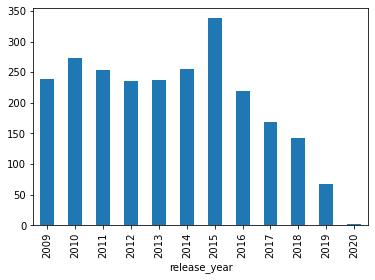

In [84]:
#let's do a histogram
grouped['release_year'].count().plot.bar()

<BarContainer object of 12 artists>

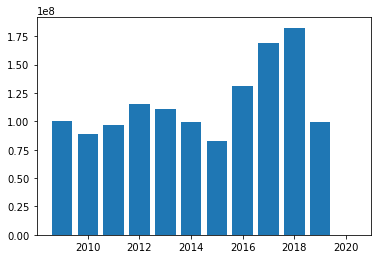

In [85]:
x = grouped['release_year'].mean().index
y = grouped['worldwide_gross'].mean()

plt.bar(x=x, height=y)

In [86]:
#see ROI 
current_tn_budgets.sort_values(by=['roi'], ascending = False).head(15)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi,release_year,intl_gross,net_profit
5492,93,2009-09-25,Paranormal Activity,450000.0,107918810.0,194183034.0,430.517853,2009,86264224.0,193733034.0
5679,80,2015-07-10,The Gallows,100000.0,22764410.0,41656474.0,415.564740,2015,18892064.0,41556474.0
5211,12,2012-01-06,The Devil Inside,1000000.0,53262945.0,101759490.0,100.759490,2012,48496545.0,100759490.0
5459,60,2009-04-23,Home,500000.0,15433.0,44793168.0,88.586336,2009,44777735.0,44293168.0
5062,63,2011-04-01,Insidious,1500000.0,54009150.0,99870886.0,65.580591,2011,45861736.0,98370886.0
5213,14,2015-04-17,Unfriended,1000000.0,32789645.0,64364198.0,63.364198,2015,31574553.0,63364198.0
4664,65,2010-10-20,Paranormal Activity 2,3000000.0,84752907.0,177512032.0,58.170677,2010,92759125.0,174512032.0
4249,50,2017-01-20,Split,5000000.0,138141585.0,278964806.0,54.792961,2017,140823221.0,273964806.0
5189,90,2014-03-21,Godâs Not Dead,1150000.0,60755732.0,63777092.0,54.458341,2014,3021360.0,62627092.0
4248,49,2017-02-24,Get Out,5000000.0,176040665.0,255367951.0,50.073590,2017,79327286.0,250367951.0


In [88]:
#exploring...
current_tn_budgets.sort_values(by=['worldwide_gross'], ascending = False).head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi,release_year,intl_gross,net_profit
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,5.532577,2009,2.015838e+09,2.351345e+09
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,5.710167,2015,1.116649e+09,1.747311e+09
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,5.827114,2018,1.369319e+09,1.748134e+09
33,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,6.669092,2015,9.965842e+08,1.433855e+09
66,67,2015-04-03,Furious 7,190000000.0,353007020.0,1.518723e+09,6.993278,2015,1.165716e+09,1.328723e+09
26,27,2012-05-04,The Avengers,225000000.0,623279547.0,1.517936e+09,5.746382,2012,8.946564e+08,1.292936e+09
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,3.243841,2015,9.440081e+08,1.072414e+09
41,42,2018-02-16,Black Panther,200000000.0,700059566.0,1.348258e+09,5.741291,2018,6.481987e+08,1.148258e+09
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000.0,381193157.0,1.341693e+09,9.733545,2011,9.605000e+08,1.216693e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,3.153696,2017,6.965404e+08,9.997217e+08


In [89]:
#exploring...
current_tn_budgets.sort_values(by=['domestic_gross'], ascending = False).head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi,release_year,intl_gross,net_profit
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,5.710167,2015,1.116649e+09,1.747311e+09
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,5.532577,2009,2.015838e+09,2.351345e+09
41,42,2018-02-16,Black Panther,200000000.0,700059566.0,1.348258e+09,5.741291,2018,6.481987e+08,1.148258e+09
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,5.827114,2018,1.369319e+09,1.748134e+09
33,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,6.669092,2015,9.965842e+08,1.433855e+09
26,27,2012-05-04,The Avengers,225000000.0,623279547.0,1.517936e+09,5.746382,2012,8.946564e+08,1.292936e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,3.153696,2017,6.965404e+08,9.997217e+08
43,44,2018-06-15,Incredibles 2,200000000.0,608581744.0,1.242521e+09,5.212604,2018,6.339390e+08,1.042521e+09
44,45,2016-12-16,Rogue One: A Star Wars Story,200000000.0,532177324.0,1.049103e+09,4.245514,2016,5.169255e+08,8.491029e+08
134,35,2017-03-17,Beauty and the Beast,160000000.0,504014165.0,1.259200e+09,6.869998,2017,7.551855e+08,1.099200e+09


In [90]:
current_tn_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2433 entries, 0 to 5780
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2433 non-null   int64         
 1   release_date       2433 non-null   datetime64[ns]
 2   movie              2433 non-null   object        
 3   production_budget  2433 non-null   float64       
 4   domestic_gross     2433 non-null   float64       
 5   worldwide_gross    2433 non-null   float64       
 6   roi                2433 non-null   float64       
 7   release_year       2433 non-null   int32         
 8   intl_gross         2433 non-null   float64       
 9   net_profit         2433 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int32(1), int64(1), object(1)
memory usage: 199.6+ KB


Now we're gonna merge the TN Budgets table with the IMDB table to access budget info alongside genre/ratings info

In [91]:
#Normalize the title column in  current_tn_budgets so that we can merge w imdb more cleanly
df_budgets_clean = current_tn_budgets.copy(deep=True) # try to get rid of warning
df_budgets_copy = current_tn_budgets.copy(deep=True)

df_budgets_clean['normalized_title'] = df_budgets_clean['movie'].map(lambda x: normalize_string(str(x)))
df_budgets_clean['normalized_title'] = df_budgets_clean['normalized_title'] + df_budgets_clean['release_year'].astype(str)
df_budgets_clean.duplicated(subset='normalized_title', keep=False).sum()
df_budgets_clean['ntitle_duplicate'] = df_budgets_clean.duplicated(subset='normalized_title', keep=False)

#remove films that had 0 sales in the us, to save some films in the next step
df_budgets_clean = df_budgets_clean.loc[df_budgets_clean['domestic_gross'] > 0]

#update the duplicates
df_budgets_clean['ntitle_duplicate'] = df_budgets_clean.duplicated(subset='normalized_title', keep=False)

#ensure the index for comparison is unique, mourn the losses
df_budgets_clean = df_budgets_clean.loc[df_budgets_clean['ntitle_duplicate'] == False]


In [92]:
#check for duplicates to see where we lose data

df_budgets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 5772
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 1967 non-null   int64         
 1   release_date       1967 non-null   datetime64[ns]
 2   movie              1967 non-null   object        
 3   production_budget  1967 non-null   float64       
 4   domestic_gross     1967 non-null   float64       
 5   worldwide_gross    1967 non-null   float64       
 6   roi                1967 non-null   float64       
 7   release_year       1967 non-null   int32         
 8   intl_gross         1967 non-null   float64       
 9   net_profit         1967 non-null   float64       
 10  normalized_title   1967 non-null   object        
 11  ntitle_duplicate   1967 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(6), int32(1), int64(1), object(2)
memory usage: 178.6+ KB


In [93]:
#merge the two dataframes
df_imdb_tn_agg = df_budgets_clean.merge(df_imdb_clean, how="left", right_on='normalized_title', left_on="normalized_title")
df_imdb_tn_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 1966
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  1967 non-null   int64         
 1   release_date        1967 non-null   datetime64[ns]
 2   movie               1967 non-null   object        
 3   production_budget   1967 non-null   float64       
 4   domestic_gross      1967 non-null   float64       
 5   worldwide_gross     1967 non-null   float64       
 6   roi                 1967 non-null   float64       
 7   release_year        1967 non-null   int32         
 8   intl_gross          1967 non-null   float64       
 9   net_profit          1967 non-null   float64       
 10  normalized_title    1967 non-null   object        
 11  ntitle_duplicate_x  1967 non-null   bool          
 12  primary_title       1331 non-null   object        
 13  original_title      1331 non-null   object      

In [94]:
#check for data integrity...
df_imdb_tn_agg.loc[:50, ['release_date', 'movie', 'primary_title']]

,release_date,movie,primary_title
0,2009-12-18,Avatar,NaN
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides
2,2019-06-07,Dark Phoenix,Dark Phoenix
3,2015-05-01,Avengers: Age of Ultron,Avengers: Age of Ultron
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,Star Wars: The Last Jedi
5,2015-12-18,Star Wars Ep. VII: The Force Awakens,Star Wars: Episode VII - The Force Awakens
6,2018-04-27,Avengers: Infinity War,Avengers: Infinity War
7,2017-11-17,Justice League,Justice League
8,2015-11-06,Spectre,Spectre
9,2012-07-20,The Dark Knight Rises,The Dark Knight Rises


In [95]:
#cursory look shows a lot of duplicates. drop them on the title and the release date
df_imdb_tn_agg.drop_duplicates(subset=['release_date', 'primary_title'], inplace=True)


#oof. lost 20% of the data. Yikes

#df_imdb_tn_agg.loc[:50, ['release_date', 'movie', 'primary_title']]

df_imdb_tn_agg = df_imdb_tn_agg.dropna(subset=['Family','Music','Action'])

df_imdb_tn_agg.loc[df_imdb_tn_agg['release_year'] > 2009, ['release_date', 'movie', 'primary_title', 'numvotes']]

,release_date,movie,primary_title,numvotes
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,447624.0
2,2019-06-07,Dark Phoenix,Dark Phoenix,24451.0
3,2015-05-01,Avengers: Age of Ultron,Avengers: Age of Ultron,665594.0
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,Star Wars: The Last Jedi,462903.0
5,2015-12-18,Star Wars Ep. VII: The Force Awakens,Star Wars: Episode VII - The Force Awakens,784780.0
...,...,...,...,...
1956,2014-07-25,Happy Christmas,Happy Christmas,7217.0
1958,2010-11-12,Tiny Furniture,Tiny Furniture,13397.0
1959,2015-07-31,Counting,Counting,126.0
1961,2011-02-11,Raymond Did It,Raymond Did It,211.0


In [96]:
#revert to lighter normalization
df_imdb_genres['normalized_title'] = df_imdb_clean['primary_title'].map(normalize_string_mild)
df_budgets_copy['normalized_title'] = df_budgets_copy['movie'].map(normalize_string_mild)

df_merge_inclusive = df_budgets_copy.merge(df_imdb_genres, how="left", right_on='normalized_title', left_on="normalized_title")

df_merge_inclusive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2651 entries, 0 to 2650
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2651 non-null   int64         
 1   release_date       2651 non-null   datetime64[ns]
 2   movie              2651 non-null   object        
 3   production_budget  2651 non-null   float64       
 4   domestic_gross     2651 non-null   float64       
 5   worldwide_gross    2651 non-null   float64       
 6   roi                2651 non-null   float64       
 7   release_year       2651 non-null   int32         
 8   intl_gross         2651 non-null   float64       
 9   net_profit         2651 non-null   float64       
 10  normalized_title   2651 non-null   object        
 11  primary_title      1967 non-null   object        
 12  original_title     1967 non-null   object        
 13  start_year         1967 non-null   float64       
 14  runtime_

In [97]:
#let's clean

df_merge_inclusive.dropna(inplace=True)  #have 2168 values remaining
df_merge_inclusive.drop_duplicates(subset=['release_date', 'primary_title'], inplace=True)
df_merge_inclusive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1767 entries, 0 to 2648
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 1767 non-null   int64         
 1   release_date       1767 non-null   datetime64[ns]
 2   movie              1767 non-null   object        
 3   production_budget  1767 non-null   float64       
 4   domestic_gross     1767 non-null   float64       
 5   worldwide_gross    1767 non-null   float64       
 6   roi                1767 non-null   float64       
 7   release_year       1767 non-null   int32         
 8   intl_gross         1767 non-null   float64       
 9   net_profit         1767 non-null   float64       
 10  normalized_title   1767 non-null   object        
 11  primary_title      1767 non-null   object        
 12  original_title     1767 non-null   object        
 13  start_year         1767 non-null   float64       
 14  runtime_

In [98]:
#remove genres columns with all zero values

df_merge_inclusive = df_merge_inclusive.loc[:, (df_merge_inclusive!=0).any(axis=0)] #thanks stackoverflow
df_merge_inclusive.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi,release_year,intl_gross,net_profit,...,Sci-Fi,Drama,Horror,Documentary,Mystery,Crime,Biography,Romance,War,Musical
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,5.532577,2009,2.015838e+09,2.351345e+09,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.546673,2011,8.046000e+08,6.350639e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-0.572108,2019,1.070000e+08,-2.002376e+08,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,3.243841,2015,9.440081e+08,1.072414e+09,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,5.827114,2018,1.369319e+09,1.748134e+09,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
genres_list = ['Drama', 'Fantasy', 'Adventure', 'Crime', 'Sport', 'Western', 'Biography', 
               'Romance', 'History', 'Documentary', 'War', 'Comedy', 'Horror', 'Family',
              'Music', 'Action', 'Thriller', 'Musical', 'Mystery', 'Sci-Fi', 'Animation']

In [100]:
#take 2020 out 

df_merge_inclusive = df_merge_inclusive.loc[df_merge_inclusive['release_year'] < 2020]
df_merge_inclusive['release_year'].unique()

array([2009, 2011, 2019, 2015, 2018, 2017, 2012, 2013, 2010, 2016, 2014])

In [122]:
y = df_merge_inclusive[genres_list].sum().sort_values(ascending=False)
sorted_genres = y.index.tolist()
print(sorted_genres)
y

['Drama', 'Comedy', 'Action', 'Adventure', 'Thriller', 'Crime', 'Romance', 'Horror', 'Sci-Fi', 'Mystery', 'Biography', 'Fantasy', 'Family', 'Animation', 'Music', 'History', 'Documentary', 'Sport', 'War', 'Western', 'Musical']


Drama          896.0
Comedy         598.0
Action         477.0
Adventure      368.0
Thriller       312.0
Crime          278.0
Romance        229.0
Horror         218.0
Sci-Fi         152.0
Mystery        151.0
Biography      146.0
Fantasy        136.0
Family         103.0
Animation      101.0
Music           62.0
History         54.0
Documentary     48.0
Sport           37.0
War             24.0
Western         15.0
Musical          9.0
dtype: float64

<BarContainer object of 21 artists>

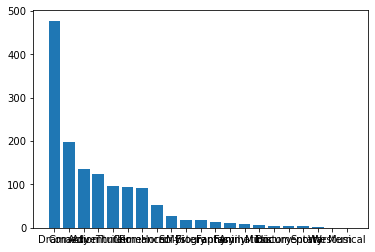

In [141]:
plt.bar(x=sorted_genres, height=y)

In [139]:
df_action = df_merge_inclusive.loc[df_merge_inclusive['Action'] == 1]

df_action.loc[:20, ['release_year', 'movie', 'worldwide_gross', 'Action']].sort_values(by="worldwide_gross", ascending=False)

,release_year,movie,worldwide_gross,Action
6,2018,Avengers: Infinity War,2.048134e+09,1.0
3,2015,Avengers: Age of Ultron,1.403014e+09,1.0
20,2017,The Fate of the Furious,1.234846e+09,1.0
14,2016,Captain America: Civil War,1.140069e+09,1.0
9,2012,The Dark Knight Rises,1.084439e+09,1.0
1,2011,Pirates of the Caribbean: On Stranger Tides,1.045664e+09,1.0
8,2015,Spectre,8.796209e+08,1.0
15,2016,Batman v Superman: Dawn of Justice,8.675003e+08,1.0
7,2017,Justice League,6.559452e+08,1.0
10,2018,Solo: A Star Wars Story,3.931513e+08,1.0


In [140]:
y = df_action[genres_list].sum().sort_values(ascending=False)
y

Action         477.0
Adventure      198.0
Drama          135.0
Crime          123.0
Thriller        97.0
Comedy          95.0
Sci-Fi          92.0
Fantasy         52.0
Horror          28.0
Animation       19.0
Mystery         17.0
Biography       14.0
Romance         11.0
Family           9.0
Western          6.0
History          5.0
Sport            5.0
War              3.0
Documentary      1.0
Music            0.0
Musical          0.0
dtype: float64

In [104]:
df_action.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477 entries, 1 to 2603
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 477 non-null    int64         
 1   release_date       477 non-null    datetime64[ns]
 2   movie              477 non-null    object        
 3   production_budget  477 non-null    float64       
 4   domestic_gross     477 non-null    float64       
 5   worldwide_gross    477 non-null    float64       
 6   roi                477 non-null    float64       
 7   release_year       477 non-null    int32         
 8   intl_gross         477 non-null    float64       
 9   net_profit         477 non-null    float64       
 10  normalized_title   477 non-null    object        
 11  primary_title      477 non-null    object        
 12  original_title     477 non-null    object        
 13  start_year         477 non-null    float64       
 14  runtime_m

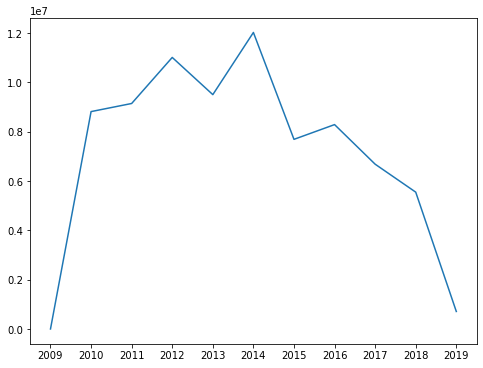

In [179]:
#test whether we can make a line graph using df_action
fig, ax = plt.subplots(figsize=(8,6))

grouped_action = df_action.groupby('release_year')
x=grouped_action['release_year'].sum().index
y=grouped_action['numvotes'].sum()
ax.xaxis.set_major_locator(plt.MultipleLocator(1))

ax.plot(x,y)


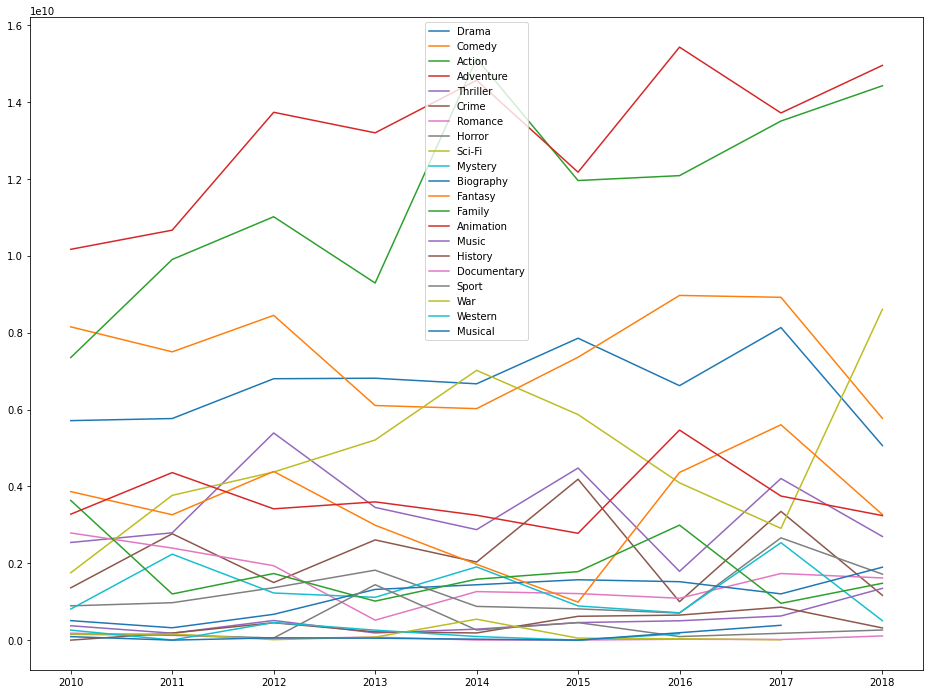

In [177]:
#test whether we can make a line graph using df_action

df_lines = df_merge_inclusive.loc[df_merge_inclusive["release_year"] < 2019]
df_lines = df_lines.loc[df_lines["release_year"] > 2009]

fig, ax = plt.subplots(figsize=(16,12))
ax.xaxis.set_major_locator(plt.MultipleLocator(1))

for genre in sorted_genres:
    df = df_lines.loc[df_lines[genre] == 1]
    
    grouped = df.groupby('release_year')
    x=grouped['release_year'].sum().index
    y=grouped['worldwide_gross'].sum()


    ax.plot(x,y)
ax.legend(sorted_genres)


In [178]:
#pull only most interesting lines

df_lines = df_merge_inclusive.loc[df_merge_inclusive["release_year"] < 2019]
df_lines = df_lines.loc[df_lines["release_year"] > 2009]

fig, ax = plt.subplots(figsize=(16,12))
ax.xaxis.set_major_locator(plt.MultipleLocator(1))

for genre in sorted_genres:
    df = df_lines.loc[df_lines[genre] == 1]
    

    x=df["release_date"]
    y=df['worldwide_gross']


    ax.plot(x,y)
ax.legend(sorted_genres)


Locator attempting to generate 3595 ticks ([14460.0, ..., 18054.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3595 ticks ([14460.0, ..., 18054.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3595 ticks ([14460.0, ..., 18054.0]), which exceeds Locator.MAXTICKS (1000).


Error in callback <function flush_figures at 0x000001FBF6462940> (for post_execute):


KeyboardInterrupt: 

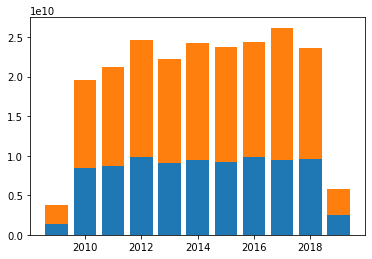

In [110]:
year_group = df_merge_inclusive.groupby("release_year")

x = year_group['release_year'].mean().index
y = year_group['domestic_gross'].sum()
y2 = year_group['intl_gross'].sum()

p1 = plt.bar(x, y, color='#6E7889')
p2 = plt.bar(x, y2, bottom=y, color='#F3B54A')

plt.show()

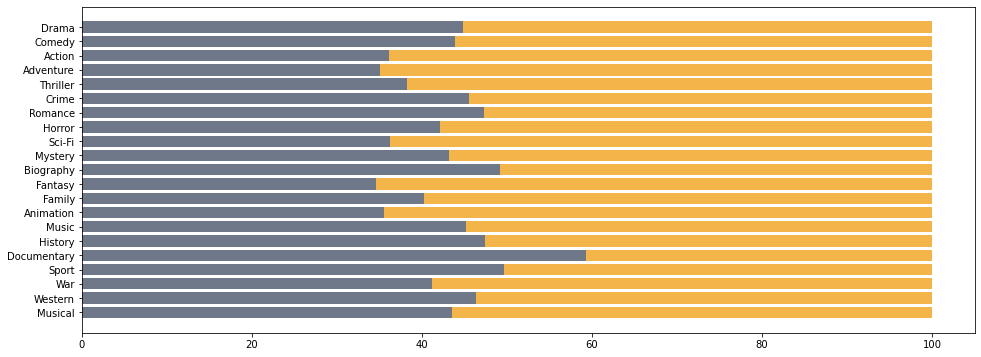

In [168]:
fig, ax = plt.subplots(figsize=(16,6))

for genre in reversed(sorted_genres):    #Reversed puts the more popular genres at the top
    df = df_merge_inclusive.loc[df_merge_inclusive[genre] == 1]
    
    x = genre
    y = df['domestic_gross'].sum() / df['worldwide_gross'].sum()  * 100
    y2 = df['intl_gross'].sum() / df['worldwide_gross'].sum() * 100
    
    p1 = plt.barh(x, y, color='#6E7889')
    p2 = plt.barh(x, y2, left=y, color='#F3B54A')

plt.show()

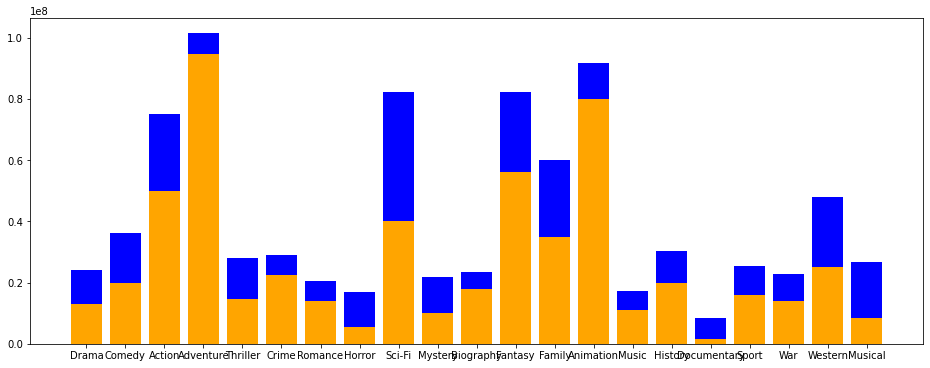

In [125]:
fig, ax = plt.subplots(figsize=(16, 6))

for genre in sorted_genres:
    df = df_merge_inclusive.loc[df_merge_inclusive[genre] == 1]
    
    x = genre
    y = df['production_budget'].mean()
    y2 = df['production_budget'].median()
    p1 = plt.bar(x, y, color='blue')
    p2 = plt.bar(x, y2, color='orange')

plt.show()

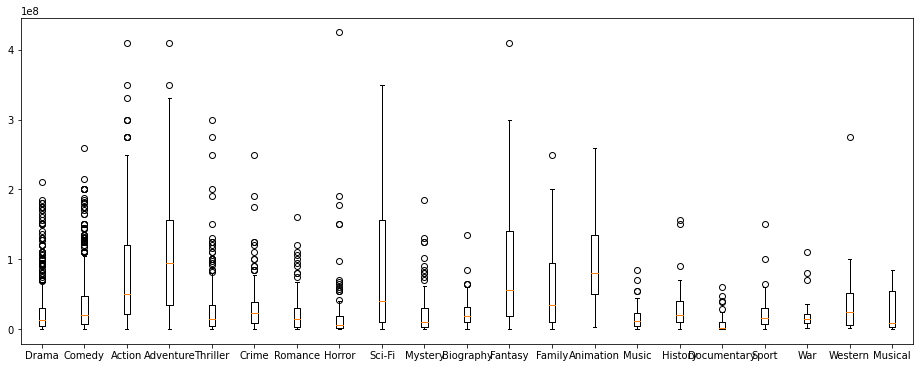

In [133]:
fig, ax = plt.subplots(figsize=(16, 6))

for idx, genre in enumerate(sorted_genres):
    df = df_merge_inclusive.loc[df_merge_inclusive[genre] == 1]
    
    x = genre
    y = df['production_budget']
    #y2 = df['production_budget'].median()
    p1 = plt.boxplot(y, positions = [idx])
   # p2 = plt.bar(x, y2, color='orange')

ax.set_xticklabels(sorted_genres)
plt.show()

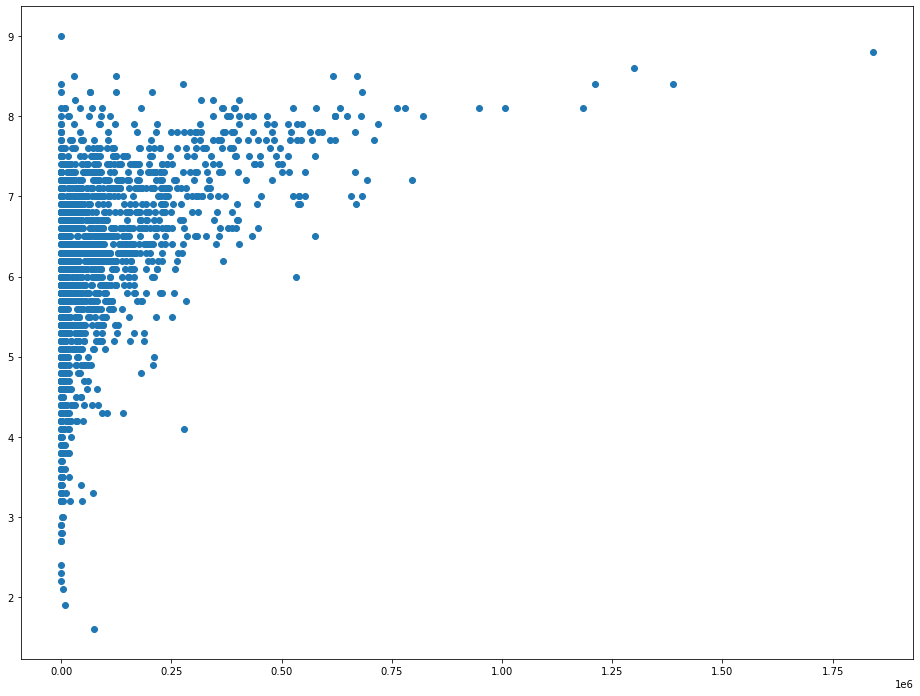

In [166]:
#let's look at ratings
fig, ax = plt.subplots(figsize=(16, 12))
x = df_merge_inclusive['numvotes']
y = df_merge_inclusive['averagerating']
ax.plot(x, y, 'o')

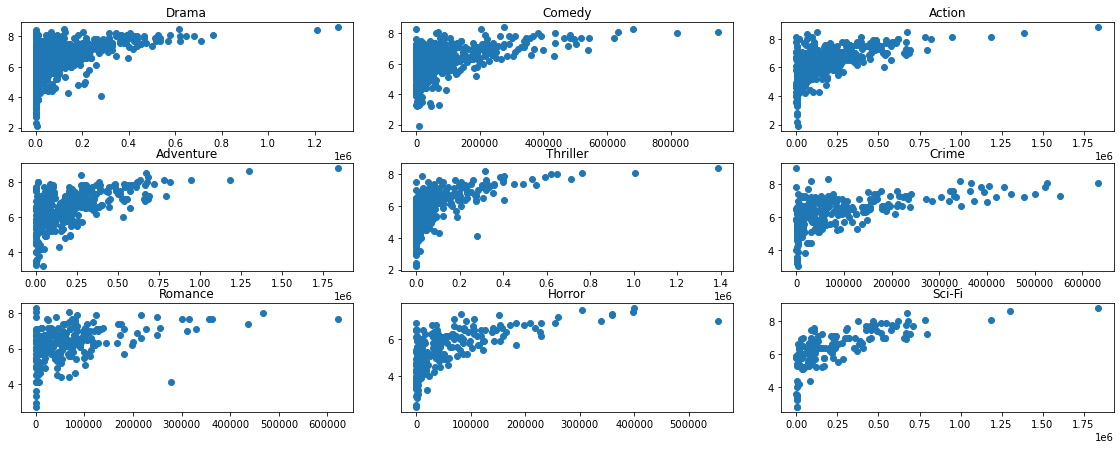

In [152]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 6))
fig.tight_layout()

for n in range(9):
    df = df_merge_inclusive.loc[df_merge_inclusive[sorted_genres[n]] == 1]
    
    row = n//3
    col = n%3
    ax = axes[row][col]
    
    x = df['numvotes']
    y = df['averagerating']
    #y2 = df['production_budget'].median()
    ax.plot(x, y, 'o')
   # p2 = plt.bar(x, y2, color='orange')
    ax.set_title(sorted_genres[n])


plt.show()

In [156]:
df_merge_inclusive.sort_values(by="numvotes", ascending=False).head(50)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi,release_year,intl_gross,net_profit,...,Sci-Fi,Drama,Horror,Documentary,Mystery,Crime,Biography,Romance,War,Musical
114,38,2010-07-16,Inception,160000000.0,292576195.0,8.355246e+08,4.222029,2010,5.429484e+08,6.755246e+08,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,11,2012-07-20,The Dark Knight Rises,275000000.0,448139099.0,1.084439e+09,2.943415,2012,6.363000e+08,8.094391e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109,32,2014-11-05,Interstellar,165000000.0,188017894.0,6.663794e+08,3.038663,2014,4.783615e+08,5.013794e+08,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,69,2012-12-25,Django Unchained,100000000.0,162805434.0,4.499483e+08,3.499483,2012,2.871429e+08,3.499483e+08,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,27,2012-05-04,The Avengers,225000000.0,623279547.0,1.517936e+09,5.746382,2012,8.946564e+08,1.292936e+09,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
342,52,2010-02-19,Shutter Island,80000000.0,128012934.0,2.994618e+08,2.743272,2010,1.714488e+08,2.194618e+08,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
94,14,2014-08-01,Guardians of the Galaxy,170000000.0,333172112.0,7.708675e+08,3.534515,2014,4.376954e+08,6.008675e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
495,56,2016-02-12,Deadpool,58000000.0,363070709.0,8.010256e+08,12.810786,2016,4.379549e+08,7.430256e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
336,38,2012-03-23,The Hunger Games,80000000.0,408010692.0,6.779234e+08,7.474042,2012,2.699127e+08,5.979234e+08,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138,75,2015-05-15,Mad Max: Fury Road,150000000.0,153636354.0,3.700980e+08,1.467320,2015,2.164617e+08,2.200980e+08,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [163]:
highly_rated = df_merge_inclusive.loc[df_merge_inclusive["averagerating"] > 8]

highly_rated.head(40)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi,release_year,intl_gross,net_profit,...,Sci-Fi,Drama,Horror,Documentary,Mystery,Crime,Biography,Romance,War,Musical
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,5.827114,2018,1.369319e+09,1.748134e+09,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,11,2012-07-20,The Dark Knight Rises,275000000.0,448139099.0,1.084439e+09,2.943415,2012,6.363000e+08,8.094391e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,27,2012-05-04,The Avengers,225000000.0,623279547.0,1.517936e+09,5.746382,2012,8.946564e+08,1.292936e+09,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,47,2010-06-18,Toy Story 3,200000000.0,415004880.0,1.068880e+09,4.344398,2010,6.538746e+08,8.688795e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,2,2017-11-22,Coco,175000000.0,209726015.0,7.980081e+08,3.560046,2017,5.882821e+08,6.230081e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,14,2014-08-01,Guardians of the Galaxy,170000000.0,333172112.0,7.708675e+08,3.534515,2014,4.376954e+08,6.008675e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109,32,2014-11-05,Interstellar,165000000.0,188017894.0,6.663794e+08,3.038663,2014,4.783615e+08,5.013794e+08,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114,38,2010-07-16,Inception,160000000.0,292576195.0,8.355246e+08,4.222029,2010,5.429484e+08,6.755246e+08,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138,75,2015-05-15,Mad Max: Fury Road,150000000.0,153636354.0,3.700980e+08,1.467320,2015,2.164617e+08,2.200980e+08,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,69,2012-12-25,Django Unchained,100000000.0,162805434.0,4.499483e+08,3.499483,2012,2.871429e+08,3.499483e+08,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [165]:
numvotes_mean = df_merge_inclusive["numvotes"].mean()

highly_rated.loc[highly_rated["numvotes"] > numvotes_mean]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi,release_year,intl_gross,net_profit,...,Sci-Fi,Drama,Horror,Documentary,Mystery,Crime,Biography,Romance,War,Musical
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,5.827114,2018,1.369319e+09,1.748134e+09,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,11,2012-07-20,The Dark Knight Rises,275000000.0,448139099.0,1.084439e+09,2.943415,2012,6.363000e+08,8.094391e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,27,2012-05-04,The Avengers,225000000.0,623279547.0,1.517936e+09,5.746382,2012,8.946564e+08,1.292936e+09,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,47,2010-06-18,Toy Story 3,200000000.0,415004880.0,1.068880e+09,4.344398,2010,6.538746e+08,8.688795e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,2,2017-11-22,Coco,175000000.0,209726015.0,7.980081e+08,3.560046,2017,5.882821e+08,6.230081e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,14,2014-08-01,Guardians of the Galaxy,170000000.0,333172112.0,7.708675e+08,3.534515,2014,4.376954e+08,6.008675e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109,32,2014-11-05,Interstellar,165000000.0,188017894.0,6.663794e+08,3.038663,2014,4.783615e+08,5.013794e+08,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114,38,2010-07-16,Inception,160000000.0,292576195.0,8.355246e+08,4.222029,2010,5.429484e+08,6.755246e+08,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138,75,2015-05-15,Mad Max: Fury Road,150000000.0,153636354.0,3.700980e+08,1.467320,2015,2.164617e+08,2.200980e+08,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,69,2012-12-25,Django Unchained,100000000.0,162805434.0,4.499483e+08,3.499483,2012,2.871429e+08,3.499483e+08,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
